# Yelp Data Challenge - Clustering and PCA

BitTiger DS501-1802

May 2018

Yan Wei

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('data/last_2_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,date_new
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ,2016-03-31
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ,2015-06-29
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA,2015-03-16
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g,2016-02-10
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g,2017-02-14


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [4]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [11]:
# Make a column and take the values, save to a variable named "target"
df['simple_rating'] = df['stars'] == 5

In [13]:
target = df['simple_rating'].values

In [15]:
target[:5]

array([ True, False,  True,  True,  True], dtype=bool)

#### You may want to look at the statistic of the target variable

In [17]:
# To be implemented
target.mean()

0.46397299477268145

### Create training dataset and test dataset

In [18]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
documents_train, documents_test, target_train, target_test = train_test_split(documents, target, test_size = 0.99)

In [ ]:
# Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
from nltk.corpus import stopwords
vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features = 1000)

In [25]:
# Train the model with your training data
vectors = vectorizer.fit_transform(documents_train).toarray()

In [26]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [27]:
# Use the trained model to transform all the reviews
X_test = vectorizer.transform(documents_test)

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [30]:
X = vectors
y = target_train
X_test = X_test
y_test = target_test

In [94]:
# To be implemented
from sklearn.cluster import KMeans

kmeans = KMeans()

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [32]:
# To be implemented
predict = kmeans.predict(X_test)

In [33]:
predict.shape

(510595,)

In [34]:
X.shape

(5157, 1000)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [95]:
# To be implemented
print('cluster centers:\n')
print(kmeans.cluster_centers_)

cluster centers:

[[ 0.00246409  0.00690138  0.00089777 ...,  0.00197671  0.00350419
   0.00706658]
 [ 0.00105666  0.00416204  0.00099533 ...,  0.00097387  0.00188804
   0.00471697]
 [ 0.00282328  0.02077862  0.0037536  ...,  0.00466707  0.00169266
   0.00204031]
 ..., 
 [ 0.00049766  0.00346777  0.00107839 ...,  0.0015817   0.00112433
   0.00547295]
 [ 0.00290214  0.00840249  0.00100114 ...,  0.00131627  0.00489353
   0.00826077]
 [ 0.00330327  0.0054533   0.00236039 ...,  0.00107655  0.00254509
   0.00336855]]


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [96]:
kmeans.cluster_centers_.shape

(8, 1000)

In [97]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print('Top 10 features for each cluster: \n')
for num, centroid in enumerate(top_centroids):
    print('cluster # %d: %s' % (num+1, ', '.join(words[i] for i in centroid)))

Top 10 features for each cluster: 

cluster # 1: good, food, really, place, service, nice, pretty, like, great, would
cluster # 2: love, best, place, vegas, always, food, amazing, go, las, service
cluster # 3: us, food, order, service, minutes, time, came, get, even, table
cluster # 4: burger, fries, burgers, good, place, shake, cheese, great, food, one
cluster # 5: sushi, roll, rolls, great, place, eat, fresh, good, ayce, best
cluster # 6: great, food, service, place, awesome, definitely, friendly, back, time, staff
cluster # 7: chicken, food, place, like, ordered, good, one, delicious, get, go
cluster # 8: pizza, good, crust, cheese, place, great, like, slice, ordered, best


In [98]:
print(top_centroids)

[[367 324 683 633 760 561 659 470 371 987]
 [493  85 633 935  31 324  32 363 454 760]
 [927 324 591 760 532 885 131 352 272 850]
 [116 340 117 367 633 765 147 371 324 580]
 [848 713 714 371 633 251 334 367  62  85]
 [371 324 760 633  60 216 338  64 885 817]
 [150 324 633 470 592 367 580 217 352 363]
 [632 367 198 147 633 371 470 784 592  85]]


#### Try different k
If you set k == to a different number, how does the top features change?

In [99]:
kmeans_5 = KMeans(n_clusters = 5)

kmeans_5.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [100]:
predict = kmeans_5.predict(X_test)

In [101]:
feature_num = 8
top_centroids = kmeans_5.cluster_centers_.argsort()[:,-1:-(feature_num+1):-1]
print('Top %d features for each cluster: \n' % (feature_num))
for num, centroid in enumerate(top_centroids):
    print('cluster # %d: %s' % (num+1, ', '.join(words[i] for i in centroid)))

Top 8 features for each cluster: 

cluster # 1: chicken, good, rice, thai, fried, food, ordered, salad
cluster # 2: good, food, place, like, time, service, get, one
cluster # 3: pizza, good, great, crust, cheese, place, like, slice
cluster # 4: great, food, place, service, love, amazing, good, friendly
cluster # 5: burger, fries, burgers, good, place, shake, one, got


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [103]:
assigned_cluster = kmeans.transform(X).argmin(axis = 1)

In [104]:
assigned_cluster.shape

(5157,)

In [105]:
documents_train.shape

(5157,)

In [106]:
# To be implemented
for i in range(kmeans.n_clusters):
    cluster_index = np.arange(0, X.shape[0])[assigned_cluster == i]
    sample_review_index = np.random.choice(cluster_index)
    print('cluster # %d:' % (i+1))
    print('     rating: %d stars' % (df.ix[sample_review_index,'stars']))
    print('     review: %s \n' % (df.ix[sample_review_index,'text']))

cluster # 1:
     rating: 3 stars
     review: Buffets are buffets, you tend to eat too much and come out feeling slightly ill. As buffets go this one was okay. Yummy smoked salmon by the sushi, the roast beef was a bit tough but tasted great with the sauerkraut.  Fried prawns were worth the short wait, the snow crab legs a bit average.  All and all a good meal but nothing amazing 

cluster # 2:
     rating: 5 stars
     review: We had lunch twice during my vacation in Vegas and both experiences were excellent! The staff was very friendly and attentive.  We were a group of 9 and we were still taken care of almost immediately. This location is inside the Venetian Hotel feeling like you are in Italy! We were also lucky enough to enjoy a show right before sitting down for lunch! If you are in the area I recommend for you to stop by and enjoy lunch or dinner! 

cluster # 3:
     rating: 5 stars
     review: Why are you looking at reviews? You already know this shits bomb. The employees at 

## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [113]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
df['business_id'].value_counts().head()


RESDUcs7fIiihp38-d6_6g    4059
hihud--QRriCYZw1zZvW4g    3156
4JNXUYY8wbaaDmk3BPzlWw    2999
cYwJA2A6I12KNkm2rtXd5g    2983
f4x1YBxkLrZg652xt2KR5g    2744
Name: business_id, dtype: int64

In [114]:
df['business_id'].value_counts().argmax()

'RESDUcs7fIiihp38-d6_6g'

In [187]:
df_top_restaurant = df[df['business_id'] == 'RESDUcs7fIiihp38-d6_6g'].copy().reset_index()

In [188]:
df_top_restaurant.head()

,index,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,date_new,simple_rating
0,228947,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2015-02-25,0,pWnR3FNqTq1AoaZVj6cayw,3,"Date & Time: Tuesday, 2/24/15 @ 2pm\n\nThe buf...",0,RFIZhrka0gCpiL62M5E93g,2015-02-25,False
1,228948,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2017-07-02,0,Xci8QJaDOB7OazJIP9U0Cw,5,I'm staying at Caesar's Palace for 4th of July...,0,J90_7u_8vPYa03GMohNxAA,2017-07-02,True
2,228949,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2015-12-29,0,IZO6o6l-T8VKH-4eTzJNzw,3,Great buffet and beautiful food presentation. ...,0,KGGA28eimhhOgHmSfyhEgw,2015-12-29,False
3,228950,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2016-03-19,0,KNYBYYO0Iq1QEsP4noql5g,4,"By far the best buffet in Vegas!! A must stop,...",2,gJGXoQ6UzqK-cWVO8MnGHA,2016-03-19,False
4,228951,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2015-10-14,0,9SGHR-0E37W9rC56uJeFPA,5,Wholly schneikeis! This was simply the best ...,0,ej7th1TBk_WA_y4GU0n_iw,2015-10-14,True


In [116]:
df_top_restaurant.shape

(4059, 14)

We can also load restaurant profile information from the business dataset (optional)

In [ ]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
pass

### Vectorize the text feature

In [117]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [118]:
# To be implemented
df_top_restaurant['rating'] = df_top_restaurant['stars'] == 5

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
target_top_restaurant = df_top_restaurant['rating'].values

#### Check the statistic of the target variable

In [120]:
# To be implemented
target_top_restaurant.dtype

dtype('bool')

In [121]:
target_top_restaurant.mean()

0.38556294653855627

### Create training dataset and test dataset

In [122]:
from sklearn.cross_validation import train_test_split

In [123]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
X_train, X_test, y_train, y_test = train_test_split(documents_top_restaurant, target_top_restaurant, test_size = 0.4)

### Get NLP representation of the documents

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features = 2000)

In [126]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(X_train).toarray()

In [127]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [128]:
# Use the trained model to transform the test data
vectors_test = vectorizer.transform(X_test)

In [132]:
# Use the trained model to transform all the data
vectors_all = vectorizer.transform(documents_top_restaurant)

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [139]:
# To be implemented
from sklearn.cluster import KMeans

kmeans_top = KMeans(n_clusters = 5)

kmeans_top.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [140]:
# To be implemented
pred_all = kmeans_top.predict(vectors_all)

In [141]:
pred_all.shape

(4059,)

In [145]:
np.unique(pred_all)

array([0, 1, 2, 3, 4], dtype=int32)

#### Inspect the centroids

In [146]:
# To be implemented
centroids = kmeans_top.cluster_centers_

In [147]:
centroids.shape

(5, 2000)

#### Find the top 10 features for each cluster.

In [151]:
# To be implemented
top10_features = centroids.argsort()[:, -1:-11:-1]
print('Top 10 features for each cluster: \n')
for index, feature in enumerate(top10_features):
    print('cluster # %d: %s' % (index+1, ', '.join(words[i] for i in feature)))

Top 10 features for each cluster: 

cluster # 1: food, good, buffet, place, price, worth, quality, better, really, much
cluster # 2: crab, buffet, legs, good, food, seafood, like, section, dessert, get
cluster # 3: best, buffet, vegas, food, buffets, las, one, worth, ever, quality
cluster # 4: line, wait, time, get, food, long, buffet, us, hours, back
cluster # 5: great, food, service, buffet, selection, good, worth, amazing, definitely, place


In [150]:
top10_features

array([[ 706,  775,  269, 1316, 1375, 1980, 1401,  207, 1431, 1143],
       [ 432,  269,  983,  775,  706, 1531,  991, 1542,  499,  751],
       [ 206,  269, 1892,  706,  270,  969, 1209, 1980,  607, 1401],
       [ 997, 1908, 1808,  751,  706, 1015,  269, 1877,  871,  167],
       [ 792,  706, 1562,  269, 1551,  775, 1980,  109,  487, 1316]])

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [193]:
# To be implemented
for i in range(kmeans_top.n_clusters):
    cluster = np.arange(documents_top_restaurant.shape[0])[pred_all == i]
    sample = np.random.choice(cluster)
    print('===cluster %d ===' % (i+1))
    print('  %d star: %s \n' % (df_top_restaurant.ix[sample, 'stars'], df_top_restaurant.ix[sample, 'text']))
  


===cluster 1 ===
  1 star: The service is poor, the hotel is dated, the staff is going through the motions, the restaurants serve cafeteria food. AVOID this hotel at all costs. Stay downtown before this resurrected dump. 

===cluster 2 ===
  5 star: OMG BEST BUFFET I HAVE EVER HAD IN MY LIFE IM IN LOVE. I wish I could eat here every day. There's so much food so many different options there's something for everyone! I love how unique all there sections of food are there's fresh tacos in Mexican food delicious pasta and pizza in the Italian section some pho for Vietnamese portion dimsum for Chinese sides sushi for Japanese seafood with crab legs and claws a bunch of hot meat and cold cuts they honestly had everything I got to try a bit of each and it's actually delicious that they could master so many flavors of food correctly, that's just the savory food portion. Don't get me started on desserts they were delicious and beautiful I'm at home craving the banana pudding bread. They also ha

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [199]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False) #StandardScaler can scale sparse data as long as 'with_mean = False' is passed as input.

X_train_scaled = scaler.fit_transform(vectors_train)

X_test_scaled = scaler.transform(vectors_test)

### Use PCA to transform data (train and test) and get princial components

In [203]:
X_train_scaled.shape

(2435, 2000)

In [205]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50
pca = PCA(n_components = 50)

# To be implemented
train_components = pca.fit_transform(X_train_scaled)
test_components = pca.transform(X_test_scaled.todense()) #X_test_scaled is sparse data, so pass 'todense'.


In [206]:
train_components.shape

(2435, 50)

In [207]:
test_components.shape

(1624, 50)

### See how much (and how much percentage of) variance the principal components explain

In [210]:
# How much variance the principal components explain
print(pca.explained_variance_.shape)
print(pca.explained_variance_)

(50,)
[ 11.12253951   8.76515445   5.67501777   5.42551963   5.03280175
   4.64602139   4.45050546   4.3480565    4.20002644   4.13658663
   4.10757152   4.05127798   4.00662371   3.88758372   3.84214704
   3.79835585   3.7533647    3.72908494   3.71444362   3.66490212
   3.64826588   3.59918561   3.59495239   3.54618236   3.5082002
   3.50398705   3.48173771   3.47204418   3.44814548   3.42712732
   3.41308212   3.39252499   3.376712     3.35117676   3.34767084
   3.33490815   3.29484491   3.29098678   3.26935035   3.25082128
   3.23690578   3.21228388   3.20080343   3.18958305   3.1636104
   3.15596981   3.1455713    3.12709461   3.09933431   3.09177262]


In [215]:
# How much percentage of variance the principal components explain.
print(pca.explained_variance_ratio_)

[ 0.00555899  0.00438078  0.00283634  0.00271165  0.00251537  0.00232206
  0.00222434  0.00217314  0.00209915  0.00206744  0.00205294  0.00202481
  0.00200249  0.00194299  0.00192028  0.0018984   0.00187591  0.00186378
  0.00185646  0.0018317   0.00182338  0.00179885  0.00179674  0.00177236
  0.00175338  0.00175127  0.00174015  0.00173531  0.00172336  0.00171286
  0.00170584  0.00169557  0.00168766  0.0016749   0.00167315  0.00166677
  0.00164675  0.00164482  0.001634    0.00162474  0.00161779  0.00160548
  0.00159974  0.00159414  0.00158116  0.00157734  0.00157214  0.00156291
  0.00154903  0.00154525]


### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

Text(0.5,1,'Proportion of variance explained by top 20 components')

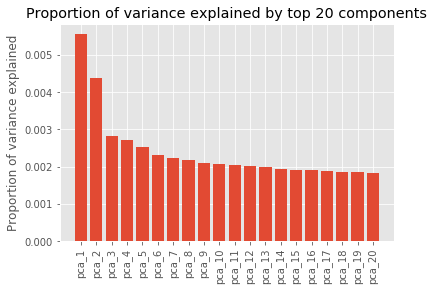

In [222]:
# To be implemented
import matplotlib.pyplot as plt
%matplotlib inline

plotting_number = 20
pca_range = np.arange(plotting_number) + 1
pca_names = ['pca_%s' % (i) for i in pca_range]

plt.bar(pca_range, pca.explained_variance_ratio_[:plotting_number])
xticks = plt.xticks(pca_range, pca_names, rotation = 90)
plt.ylabel('Proportion of variance explained')
plt.title('Proportion of variance explained by top 20 components')

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [228]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [229]:
# Get score for training set
model_lr.score(X_train_scaled, y_train)

0.99917864476386042

In [230]:
# Get score for test set
model_lr.score(X_test_scaled, y_test)

0.7038177339901478

#### Use (Stardardized + PCA) tf-idf vectors as features

In [280]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

model_lr_pca = LogisticRegression()

model_lr_pca.fit(train_components, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [232]:
# Get score for training set
model_lr_pca.score(train_components, y_train)

0.79096509240246404

In [236]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_lr_pca.score(test_components, y_test)

0.77709359605911332

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

Training score drops from 0.999 to 0.791 due to the fact that PCA with n_components 50 uses less features than previous non-PCA model. But in fact it is good thing because test score increases from 0.704 to 0.777, implying PCA preprocessing helps to tackle overfitting issue. 

#### You can plot the coefficients against principal components


In [286]:
# Create dataframe saving Principle Components and their coefficients.
PC_names = ['PC_%s' % i for i in np.arange(pca.n_components_) + 1 ]

lr_coeff = model_lr_pca.coef_.flatten().tolist()

df = pd.DataFrame({'PC_names':PC_names, 'lr_coeff':lr_coeff}).sort_values(by = ['lr_coeff'], ascending = False)

In [299]:
#Print the first and last 10 rows
pd.concat([df.head(5), df.tail(5)])

,PC_names,lr_coeff
2,PC_3,0.568846
9,PC_10,0.232996
3,PC_4,0.160280
5,PC_6,0.097773
27,PC_28,0.078635
12,PC_13,-0.131220
48,PC_49,-0.135391
6,PC_7,-0.156895
8,PC_9,-0.158395
1,PC_2,-0.310310


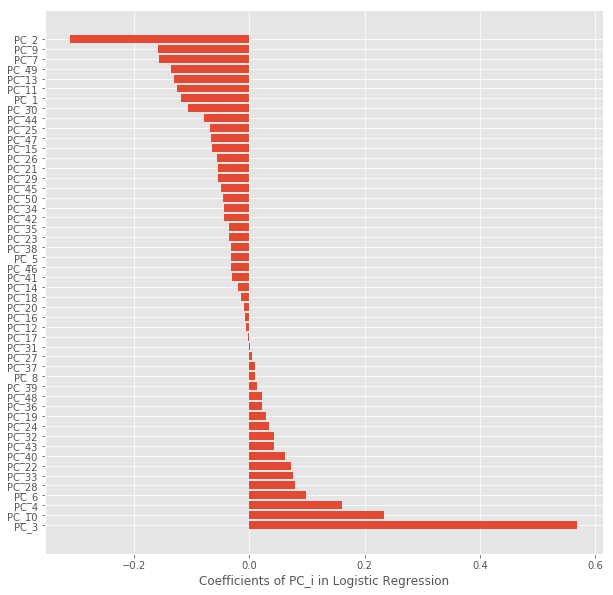

In [289]:
#Plot and visualize coefficients.
plt.figure(figsize = (10, 10))
plt.barh(np.arange(pca.n_components_)+1, df['lr_coeff'], align = 'center')
plt.yticks(np.arange(pca.n_components_)+1, df['PC_names'])
plt.xlabel('Coefficients of PC_i in Logistic Regression')
plt.show()

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [318]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 50, max_depth = 20, min_samples_leaf = 2, random_state = 12)

model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [319]:
# Get score for training set
model_rf.score(X_train_scaled, y_train)

0.91868583162217654

In [320]:
# Get score for test set
model_rf.score(X_test_scaled, y_test)

0.74507389162561577

#### Use (Stardardized + PCA) tf-idf vectors as features

In [321]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf2 = RandomForestClassifier(n_estimators = 50, max_depth = 20, min_samples_leaf = 2, random_state = 12)

model_rf2.fit(train_components, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [322]:
# Get score for training set
model_rf2.score(train_components, y_train)

0.99712525667351126

In [323]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_rf2.score(test_components, y_test)

0.75677339901477836

#### Q: What do you see from the training result and the test result?

After using PCA preprocessing, scores increase both on training(0.919 to 0.997) and test(0.745 to 0.757) sets. Performance lift in training set is higher than in test set, suggesting a more serious overfitting. Different from previous case of logistic regression, PCA preprocessing does not help to mitigate overfitting of Random Forest algorithm.  

#### You can plot the feature importances against principal components


In [335]:
# To be implemented
PC_names = ['PC_%s' % i for i in np.arange(pca.n_components_) + 1 ]

feat_imp = model_rf2.feature_importances_.tolist()

df_feature = pd.DataFrame({'PC_names':PC_names, 'feature_importance':feat_imp}).sort_values(by = ['feature_importance'], ascending = False)

In [336]:
pd.concat([df_feature.head(5), df_feature.tail(5)])

,PC_names,feature_importance
2,PC_3,0.139482
1,PC_2,0.073258
9,PC_10,0.038973
3,PC_4,0.037768
0,PC_1,0.029795
33,PC_34,0.012561
17,PC_18,0.012268
42,PC_43,0.011799
45,PC_46,0.011574
26,PC_27,0.011223


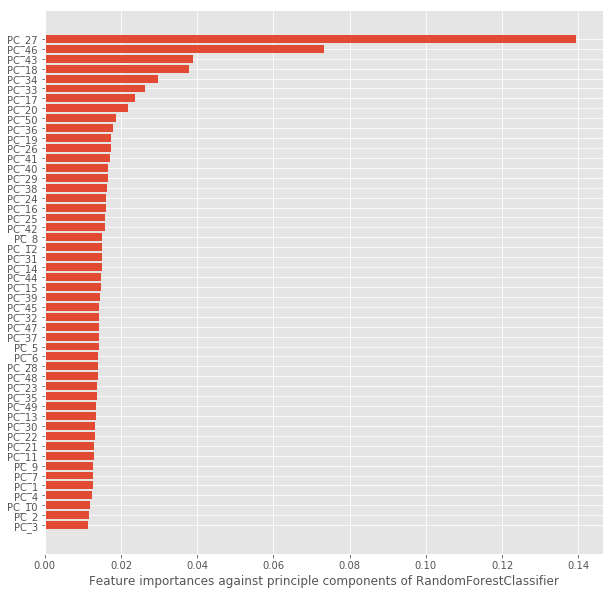

In [340]:
#Plot and visualize principle components and their feature importances. 
plt.figure(figsize = (10, 10))
plt.barh(np.arange(pca.n_components_)+1, df_feature['feature_importance'][::-1], align = 'center')
plt.yticks(np.arange(pca.n_components_)+1, df['PC_names'])
plt.xlabel('Feature importances against principle components of RandomForestClassifier')
plt.show()